In [1]:
import os
import numpy as np 
# --- provabgs --- 
from provabgs import models as Models

In [2]:
# --- plotting --- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [3]:
# load test parameter and spectrum. These were generated for the validation of the trained Speculator model
test_theta = np.load('/Users/chahah/data/provabgs/fsps.nmfburst.theta.test.npy')[:10000]
test_logspec = np.load('/Users/chahah/data/provabgs/fsps.nmfburst.lnspectrum.test.npy')[:10000]
w_fsps = np.load('/Users/chahah/data/provabgs/wave_fsps.npy')

In [4]:
fsps0 = Models.FSPS_NMF(name='nmf')
fsps1 = Models.FSPS_NMF(name='nmfburst')

In [5]:
igal = 3
theta = np.concatenate([[0.], test_theta[igal][:-1]])
zred = test_theta[igal][-1]
tage = fsps0.cosmo.age(zred).value
fburst = theta[5]
tburst = theta[6]    
tt_dust1 = theta[-3]
tt_dust2 = theta[-2]
tt_dust_index = theta[-1]
if tburst > tage: fburst = 0

In [6]:
tlookback, sfh = fsps1.SFH(theta, zred)
_, sfh_wo_burst = fsps1._SFH_nmf(np.atleast_2d(theta), zred)
sfh_burst = fsps1._SFH_burst(tburst, tlookback)

In [7]:
_, zh = fsps1.ZH(theta, zred)

(0.0, 9.495214526424839)

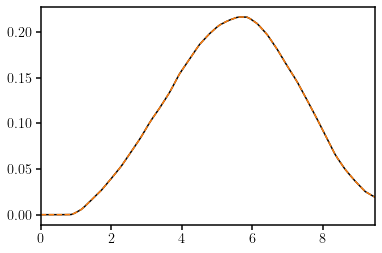

In [8]:
plt.plot(tlookback, sfh, c='k')
plt.plot(tlookback, (1 - fburst) * sfh_wo_burst + fburst* sfh_burst.flatten(), c='C1', ls='--')
plt.xlim(0., tage)

In [9]:
lssp_ref = fsps1._fsps_nmfburst(np.concatenate([theta[1:], [zred]]))
lssp_nmf = fsps1._fsps_nmf(np.concatenate([theta[1:], [zred]]))
lssp_burst = fsps1._fsps_burst(np.concatenate([theta[1:], [zred]]))

In [10]:
print(lssp_ref[1] - ((1-fburst)*lssp_nmf[1] +  fburst * lssp_burst[1]))

[0. 0. 0. ... 0. 0. 0.]


(2300.0, 10000.0)

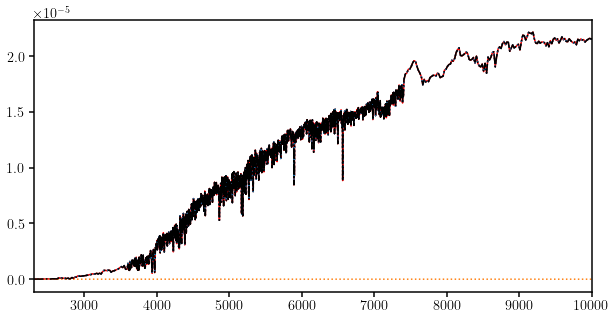

In [11]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.plot(lssp_ref[0], lssp_ref[1], c='r')
sub.plot(lssp_nmf[0], (1-fburst)*lssp_nmf[1] +  fburst * lssp_burst[1], c='k', ls=':')
sub.plot(lssp_nmf[0], (1-fburst)*lssp_nmf[1], c='C0', ls=':')
sub.plot(lssp_burst[0], fburst * lssp_burst[1], c='C1', ls=':')
sub.plot(w_fsps, np.exp(test_logspec[igal,:]), c='k', ls='-.')
sub.set_xlim(2.3e3, 1e4)

In [12]:
lssp0 = fsps0._fsps_nmf(np.concatenate([theta[1:5], theta[7:], [zred]]))

(2300.0, 10000.0)

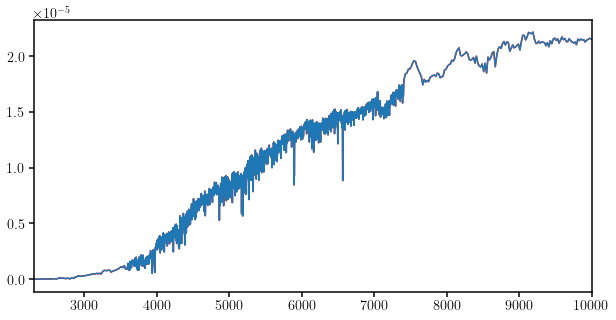

In [13]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.plot(lssp0[0], lssp0[1], c='r')
sub.plot(lssp_nmf[0], lssp_nmf[1])
sub.set_xlim(2.3e3, 1e4)